In [19]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from fuzzywuzzy import process

In [21]:
file_path = "DA -Task 2..xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

In [22]:
# Dropping columns with all null values
df_cleaned = df.drop(columns=['CAMPAIGN_NBR'])

In [23]:
# Fill missing values
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('UNKNOWN')
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].apply(lambda x: x.fillna(x.median()))

In [24]:
# Normalize categorical fields
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.str.strip().str.upper())

In [25]:
#top critical columns
critical_columns = ['KM', 'REPAIR_AGE', 'TOTALCOST', 'COMPLAINT_CD', 'GLOBAL_LABOR_CODE_DESCRIPTION']

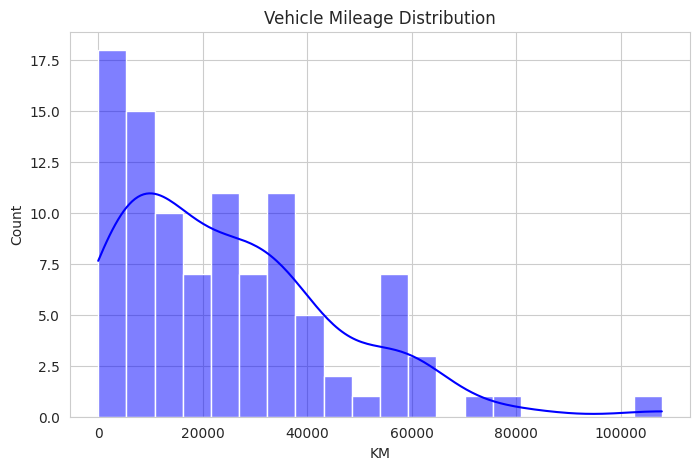

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['KM'], bins=20, kde=True, color='blue')
plt.title("Vehicle Mileage Distribution")
plt.show()

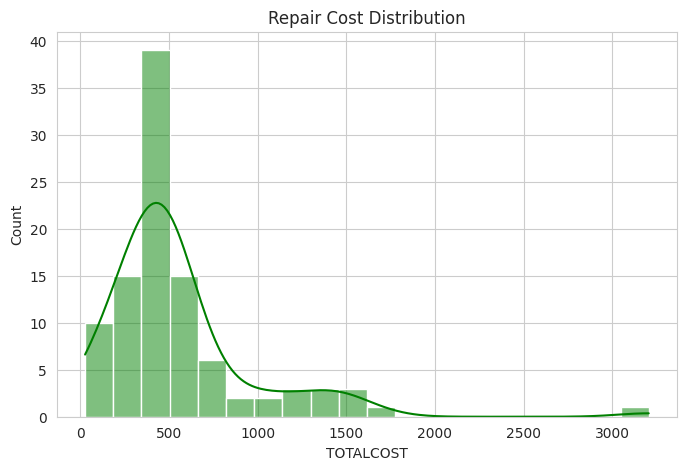

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['TOTALCOST'], bins=20, kde=True, color='green')
plt.title("Repair Cost Distribution")
plt.show()

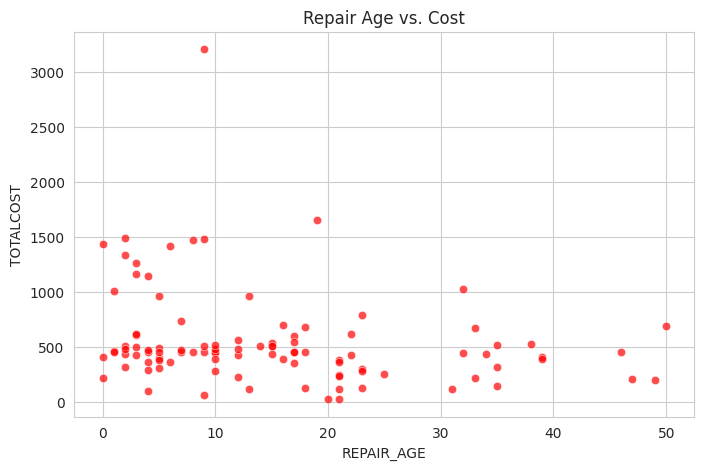

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned['REPAIR_AGE'], y=df_cleaned['TOTALCOST'], alpha=0.7, color='red')
plt.title("Repair Age vs. Cost")
plt.show()

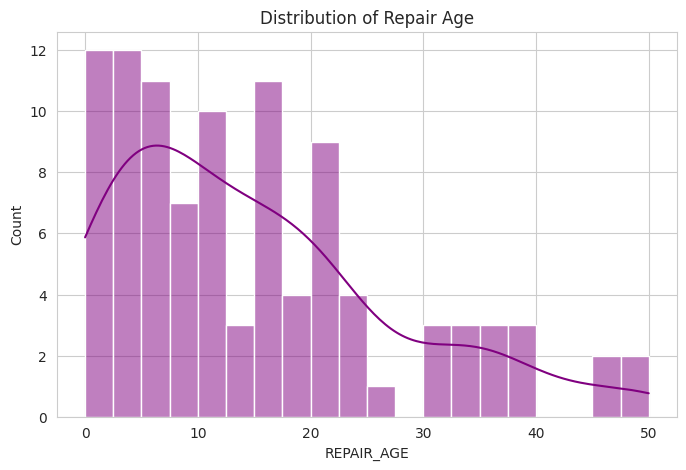

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['REPAIR_AGE'], bins=20, kde=True, color='purple')
plt.title("Distribution of Repair Age")
plt.show()

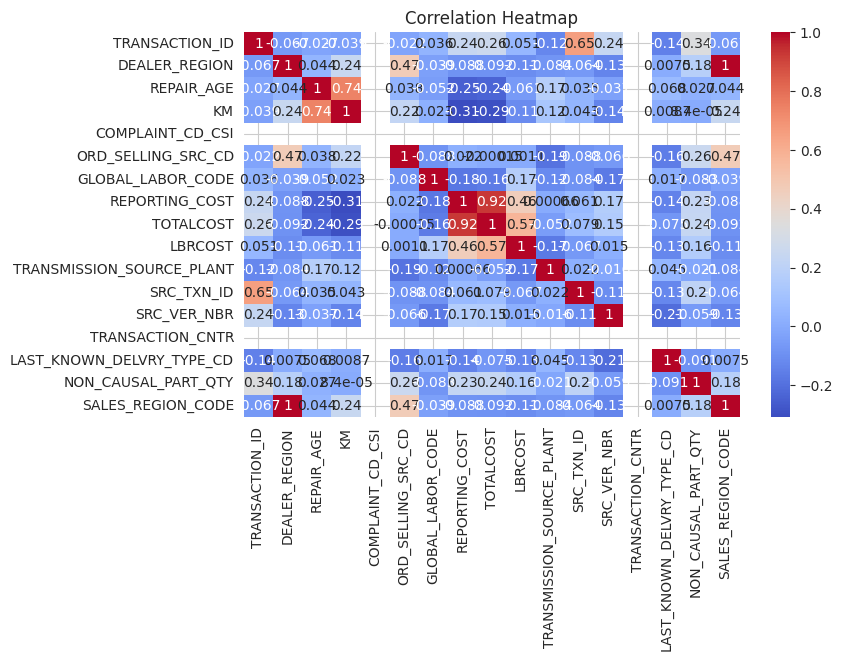

In [41]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [27]:
custom_tags = {
    'ELECTRICAL_ISSUE': ['battery', 'sensor', 'ECU', 'module', 'wiring'],
    'SAFETY_CONCERN': ['brake', 'airbag', 'collision', 'failure', 'danger'],
    'PERFORMANCE_PROBLEM': ['engine', 'power loss', 'torque', 'stalling', 'rough idle'],
    'COMFORT_FEATURES': ['seat', 'steering wheel', 'climate control', 'infotainment', 'audio'],
    'RECURRING_ISSUE': ['again', 'multiple times', 'same problem', 'recurring', 'repeat']
}


In [28]:
# Assigning tags
def assign_tags(text):
    matched_tags = [tag for tag, keywords in custom_tags.items() if any(keyword.lower() in text.lower() for keyword in keywords)]
    return ', '.join(matched_tags) if matched_tags else 'GENERAL'

df_cleaned['TAGS'] = df_cleaned[['CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'GLOBAL_LABOR_CODE_DESCRIPTION']].apply(lambda x: assign_tags(' '.join(x)), axis=1)

df_cleaned.to_csv("cleaned_data.csv", index=False)